<a href="https://colab.research.google.com/github/Meghashyamt/python/blob/master/logicalregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import librarires 
import numpy as np
import pandas as pd

#import data visuvalize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline



#import logical
from sklearn.linear_model import LogisticRegression

#import train test
from sklearn.model_selection import train_test_split

#import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from scipy import stats

In [0]:
cars=pd.read_csv("cars.csv")

In [0]:
cars.shape

(32, 12)

In [0]:
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [0]:
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

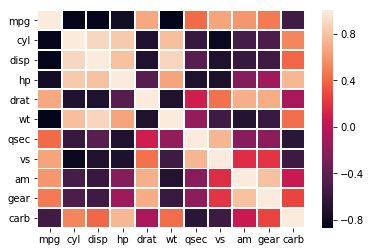

In [0]:
sb.heatmap(cars.corr(), linewidth=1)

In [0]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


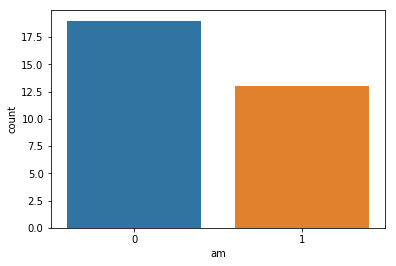

In [0]:
sb.countplot(x='am', data=cars)

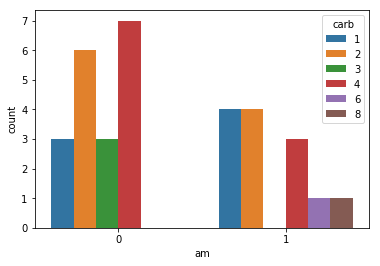

In [0]:
sb.countplot(x='am', data=cars, hue='carb')

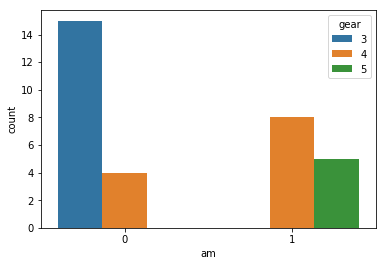

In [0]:
sb.countplot(x='am', data=cars, hue='gear')

In [0]:
X=cars.loc[:,('mpg','hp','wt','gear')]
y=cars.am

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=14)

In [0]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (25, 4)
X_test shape (7, 4)
y_train shape (25,)
y_test shape (7,)


In [0]:
model_lr= LogisticRegression()

In [0]:
model_lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_predict=model_lr.predict(X_test)

In [0]:
y_test

2     1
29    1
27    1
19    1
3     0
28    1
1     1
Name: am, dtype: int64

In [0]:
y_predict


array([1, 1, 1, 1, 0, 1, 0])

In [0]:
accuracy_score(y_test,y_predict)

0.8571428571428571

In [0]:
#r2_score(y_test,y_predict)
confusion_matrix(y_test,y_predict)

array([[1, 0],
       [1, 5]])

In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.83      0.91         6

   micro avg       0.86      0.86      0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7

